# Data Visualization Project

Open:FactSet Insights and Analysis team.  

The team mission is to educate, inspire, and empower FactSetters and clients to utilize Open:FactSet Data and Solutions.  

As part of the team you will be tasked with creating and communicating compelling stories for Marketplace content.  Secondarily, the team collective will need to develop best practices and methods for disseminating knowledge both internally and externally.  For the interview please prepare a 20-30 minute presentation covering:

1. For an audience of CTS Sales, create a presentation showcasing a FactSet content set using Python, R, or SQL.  The goal is to educate on potential applications, how a given technology is applied and how to pitch this to their client base. 
    - Python, Jupyter Notebook, Ondemand?, 
    - Unique Datasets - RBICs + ESG Data
    - Exploratory Data Analysis
    - Hans Rosling Chart


In [37]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

In [38]:
data  = Path('.', 'assets', 'rbics_esg_data_qtr.csv')
hans_rosling = pd.read_csv(data, na_values= '@NA')

In [39]:
hans_rosling = hans_rosling.dropna()

In [40]:
hans_rosling.columns = ['Symbol', 'Name', 'Date', 'mkt_val', 'rbics_econn', 'rbics_econ',
       'rbics_sectn', 'rbics_sect', 'rbics_subsectn', 'rbics_subsect',
       'rbics_indgrpn', 'rbics_indgrp', 'rbics_indn', 'rbics_ind',
       'rbics_subindn', 'rbics_subind', 'msci_esg_env', 'msci_esg_gov',
       'msci_esg_social', 'sales_total', 'sales_ps', 'sales_growth',
       'msci_esg_score', 'msci_esg_rating']

In [41]:
# RBICS Econonmic Focus Color Map 
# source:  https://matplotlib.org/2.0.2/examples/color/named_colors.html

econ_color_dict = {
    'Non-Energy Materials': 'black', 
    'Industrials': 'white', 
    'Healthcare': 'gray', 
    'Technology': 'red',
    'Consumer Cyclicals': 'orange', 
    'Utilities': 'yellow', 
    'Finance': 'green',
    'Consumer Non-Cyclicals': 'blue', 
    'Energy': 'indigo', 
    'Telecommunications': 'violet',
    'Business Services': 'pink', 
    'Consumer Services': 'chocolate',
    'Other': 'black'
    
}

In [42]:
# RBICS Sector Focus Color Map
# source:  https://matplotlib.org/2.0.2/examples/color/named_colors.html

sect_color_dict = {
    'Manufactured Products': 'black', 
    'Industrial Manufacturing': 'white',
    'Healthcare Equipment': 'lightgray', 
    'Biopharmaceuticals': 'gray',
    'Software and Consulting': 'red', 
    'Miscellaneous Retail': 'darkorange',
    'Electronic Components and Manufacturing': 'darkred', 
    'Utilities': 'yellow',
    'Healthcare Services': 'silver', 
    'Investment Services': 'lawngreen', 
    'Insurance': 'green',
    'Chemical, Plastic and Rubber Materials': 'k', 
    'Real Estate': 'seagreen',
    'Mining and Mineral Products': 'dimgray', 
    'Specialty Finance and Services': 'darkolivegreen',
    'Food and Tobacco Production': 'blue', 
    'Food and Staples Retail': 'dodgerblue',
    'Industrial Services': 'whitesmoke', 
    'Upstream Energy': 'indigo',
    'Downstream and Midstream Energy': 'blueviolet', 
    'Hardware': 'firebrick',
    'Consumer Vehicles and Parts': 'peachpuff', 
    'Telecommunications': 'violet',
    'Business Services': 'pink', 
    'Banking': 'forestgreen', 
    'Consumer Retail': 'orange',
    'Hospitality Services': 'sienna', 
    'Media and Publishing Services': 'saddlebrown',
    'Household Products': 'navy', 
    'Household Services': 'royalblue',
    'Consumer Goods': 'sandybrown',
    'General or Multi-Industry Revenue': 'black'
    
}

In [43]:
# Sum ESG Scores for Environment + Social + Government
hans_rosling.loc[:, 'rbics_sect_color'] = hans_rosling.loc[:, 'rbics_sect'].map(sect_color_dict)
#hans_rosling.loc[:, 'esg_combined'] = hans_rosling.loc[:, ['msci_esg_env','msci_esg_social', 'msci_esg_gov']].sum(axis=1)

In [65]:
def hans_rosling_date_and_rbics_sect(qtr, sect):
    #Define a function that creates a scatter plot based on x = esg_score, y = sales_total, size = mkt_val, color = rbics_sector
    #Filter by date and rbics Sector
    
    # Define a function that filters the dataframe by date    
    date_filter = hans_rosling.loc[:, 'Date'] == qtr
    hans_rosling_date = hans_rosling.loc[date_filter, :]
    
    # filter by rbics_sect
    rbics_filter = hans_rosling_date.loc[:, 'rbics_sect'] == sect
    hans_rosling_date_and_rbics = hans_rosling_date.loc[rbics_filter, :]
    
    
    #store values into array variables for scatter plot
    esg_score = hans_rosling_date_and_rbics.loc[:, 'msci_esg_score']
    sales = hans_rosling_date_and_rbics.loc[:, 'sales_total']
    mktval = hans_rosling_date_and_rbics.loc[:, 'mkt_val']
    rbics = hans_rosling_date_and_rbics.loc[:, 'rbics_sect']
    rbics_color = hans_rosling_date_and_rbics.loc[:, 'rbics_sect_color']
    ticker = hans_rosling_date_and_rbics.loc[:, 'Symbol']
    
    # Store Symbol and coordinates for select Companies into a dictionary
    # Dictionary is used for better error handling when Company does not exist in the chart
    my_dict = {}

    for symbol in ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'BRK.B', 'WMT', 'XOM',
                   'MSFT','DIS', 'TWX', 'FOX', 'PG', 'BA', 'GE', 'JNJ', 'UNH',
                   'HD', 'NKE', 'GM', 'DUK', 'JPM', 'V', 'GS', 'KO', 'MO',
                   'CVX', 'T', 'VZ', 'ADP', 'MA', 'PYPL', 'AXP']:
        symbol_filter = hans_rosling_date_and_rbics.loc[:, 'Symbol'] == symbol
        label = np.array((hans_rosling_date_and_rbics.loc[symbol_filter, ['msci_esg_score', 'sales_total']]))
        if label.size >1:
            my_dict.update({symbol: (label[0][0], label[0][1])})
    
    
    # Scatter plot
    plt.scatter(x = esg_score, y = sales,
                s = mktval/100 , edgecolors='black',
                c = rbics_color, alpha=.75)

    
    # customizations
    plt.yscale('log')
    plt.xlabel('ESG Score')
    plt.ylabel('Revenue')
    plt.xlim(-1,11)
    plt.ylim(500, 700000)
    plt.title(qtr)
    plt.yticks([1000,10000,100000], ['1b','10b','100b'])

    
    # Adding Labels for Symbol, ESG score, and Sales Total
    for key, value in my_dict.items():
        plt.text(value[0], value[1], key)
    
    
    # Add grid() 
    plt.grid(True)

    
    # return and display the plot
    return plt.show()

In [66]:
# Define a function that filters the dataframe by date    
date_filter = hans_rosling.loc[:, 'Date'] == '12/29/2017'
hans_rosling_year = hans_rosling.loc[date_filter, :]

# filter by rbics_sect
rbics_filter = hans_rosling_year.loc[:, 'rbics_sect'] == 'Specialty Finance and Services'
hans_rosling_year_and_rbics = hans_rosling_year.loc[rbics_filter, :]


In [67]:
(hans_rosling_year_and_rbics.sort_values('sales_total', ascending=False))

,Symbol,Name,Date,mkt_val,rbics_econn,rbics_econ,rbics_sectn,rbics_sect,rbics_subsectn,rbics_subsect,...,rbics_subind,msci_esg_env,msci_esg_gov,msci_esg_social,sales_total,sales_ps,sales_growth,msci_esg_score,msci_esg_rating,rbics_sect_color
14086,AXP,American Express Company,12/29/2017,85307.29000,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Credit Cards,10.0,5.6,4.9,36490.000,40.346501,3.608847,6.8,A,darkolivegreen
14141,COF,Capital One Financial Corporation,12/29/2017,48348.61336,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Credit Cards,10.0,6.1,3.5,29898.000,61.534998,7.138250,4.1,BB,darkolivegreen
14527,V,Visa Inc. Class A,12/29/2017,257324.15570,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Electronic Payment Processing,9.3,5.0,4.7,18759.000,7.665136,17.405182,6.8,A,darkolivegreen
14482,SYF,Synchrony Financial,12/29/2017,29750.21863,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Credit Cards,6.0,7.2,2.8,13758.000,17.203951,12.585925,2.3,B,darkolivegreen
14411,PYPL,PayPal Holdings Inc,12/29/2017,88344.00000,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Electronic Payment Processing,6.0,5.7,4.1,13051.000,10.710074,20.898564,5.4,BBB,darkolivegreen
14353,MA,Mastercard Incorporated Class A,12/29/2017,159533.44000,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Electronic Payment Processing,7.3,4.6,3.7,12497.000,11.657649,15.970676,5.4,BBB,darkolivegreen
14201,DFS,Discover Financial Services,12/29/2017,27531.22140,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Credit Cards,8.0,6.2,3.5,11545.000,30.874332,9.994284,4.1,BB,darkolivegreen
14247,FIS,"Fidelity National Information Services, Inc.",12/29/2017,31331.97000,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Electronic Payment Processing,6.7,1.7,4.1,9016.000,27.151786,-2.424242,3.0,BB,darkolivegreen
14076,ADS,Alliance Data Systems Corporation,12/29/2017,14042.79200,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Electronic Payment Processing,9.3,5.0,3.3,7719.400,138.093023,8.143624,4.1,BB,darkolivegreen
14250,FISV,"Fiserv, Inc.",12/29/2017,27222.58800,30.0,Finance,3030.0,Specialty Finance and Services,303010.0,Specialty Finance,...,Mixed Electronic Transaction Processing,6.7,4.6,2.7,5696.000,13.209648,3.469573,4.1,BB,darkolivegreen


In [68]:
hans_rosling.Date.unique()

array(['12/31/2010', ' 3/31/2011', ' 6/30/2011', ' 9/30/2011',
       '12/30/2011', ' 3/30/2012', ' 6/29/2012', ' 9/28/2012',
       '12/31/2012', ' 3/28/2013', ' 6/28/2013', ' 9/30/2013',
       '12/31/2013', ' 3/31/2014', ' 6/30/2014', ' 9/30/2014',
       '12/31/2014', ' 3/31/2015', ' 6/30/2015', ' 9/30/2015',
       '12/31/2015', ' 3/31/2016', ' 6/30/2016', ' 9/30/2016',
       '12/30/2016', ' 3/31/2017', ' 6/30/2017', ' 9/29/2017', '12/29/2017'], dtype=object)

In [69]:
#Splitting dates into separate variables so the Notebook doesn't crash

dateA = ['12/31/2010', ' 3/31/2011', ' 6/30/2011', ' 9/30/2011',
       '12/30/2011', ' 3/30/2012', ' 6/29/2012', ' 9/28/2012',
       '12/31/2012', ' 3/28/2013'
        ]

dateB = [' 6/28/2013', ' 9/30/2013','12/31/2013', ' 3/31/2014', 
         ' 6/30/2014', ' 9/30/2014', '12/31/2014', ' 3/31/2015', 
         ' 6/30/2015', ' 9/30/2015'
        ]

dateC = ['12/31/2015', ' 3/31/2016', ' 6/30/2016', ' 9/30/2016',
         '12/30/2016', ' 3/31/2017', ' 6/30/2017', ' 9/29/2017', 
         '12/29/2017']

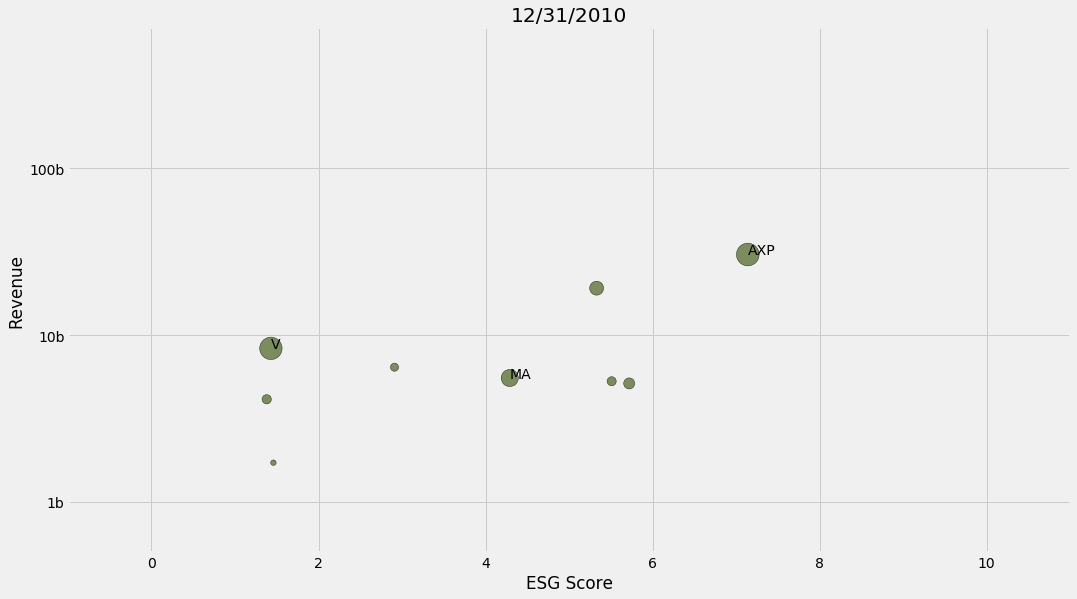

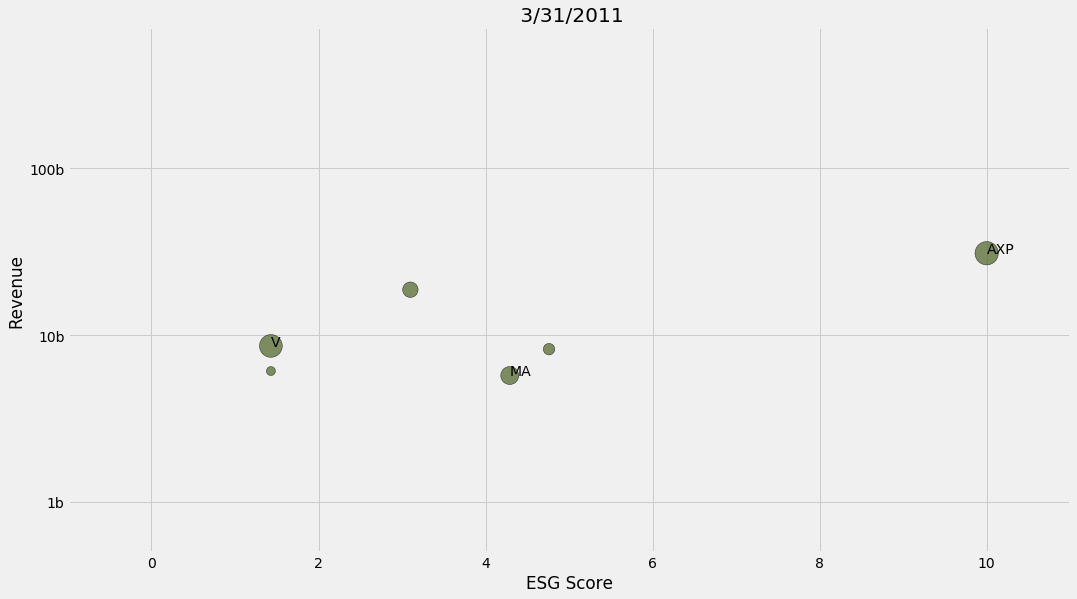

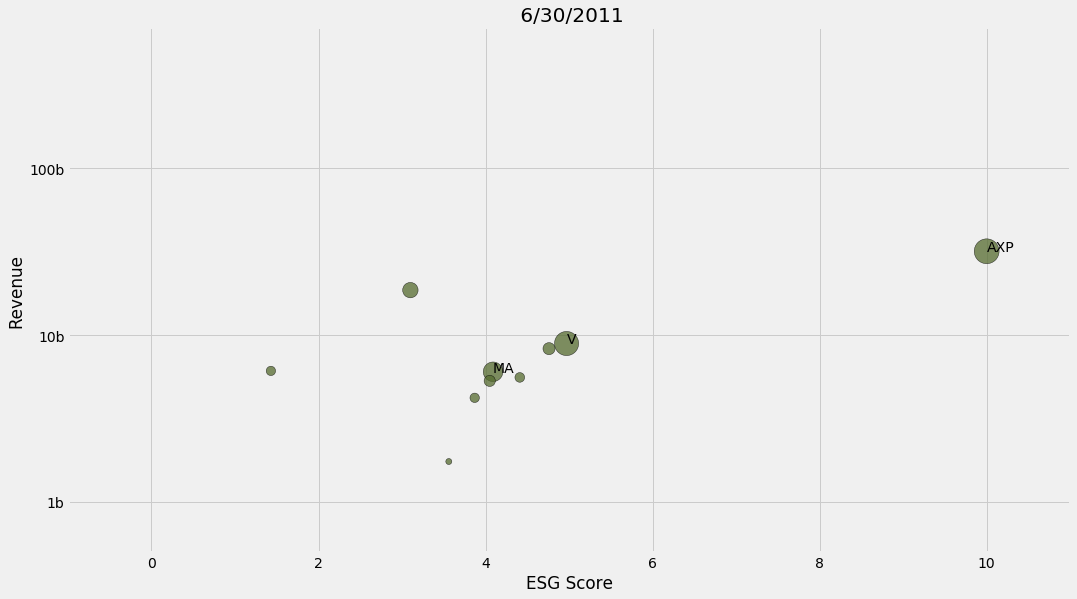

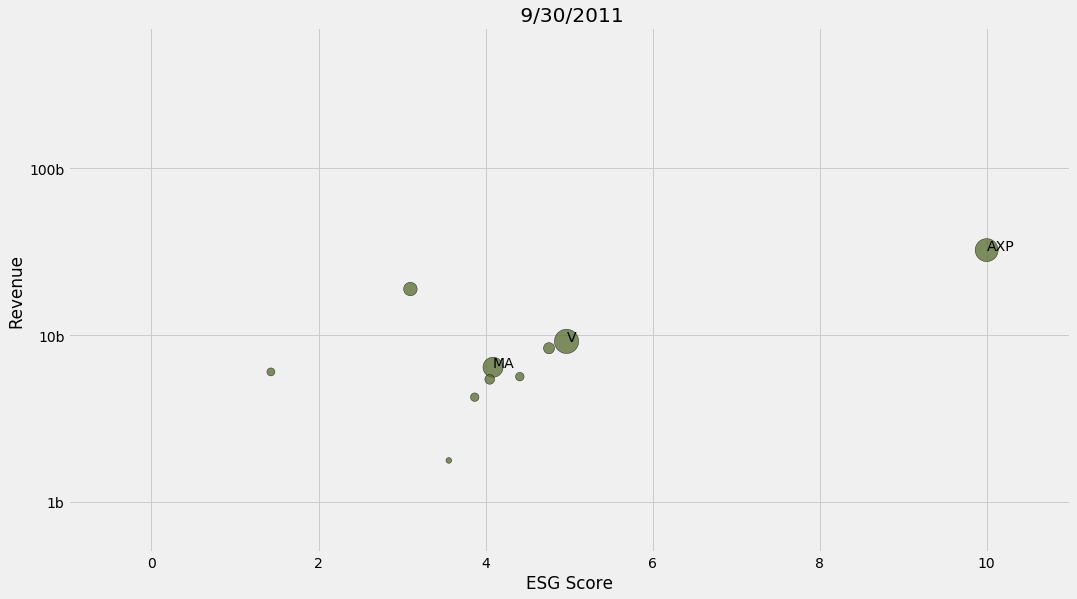

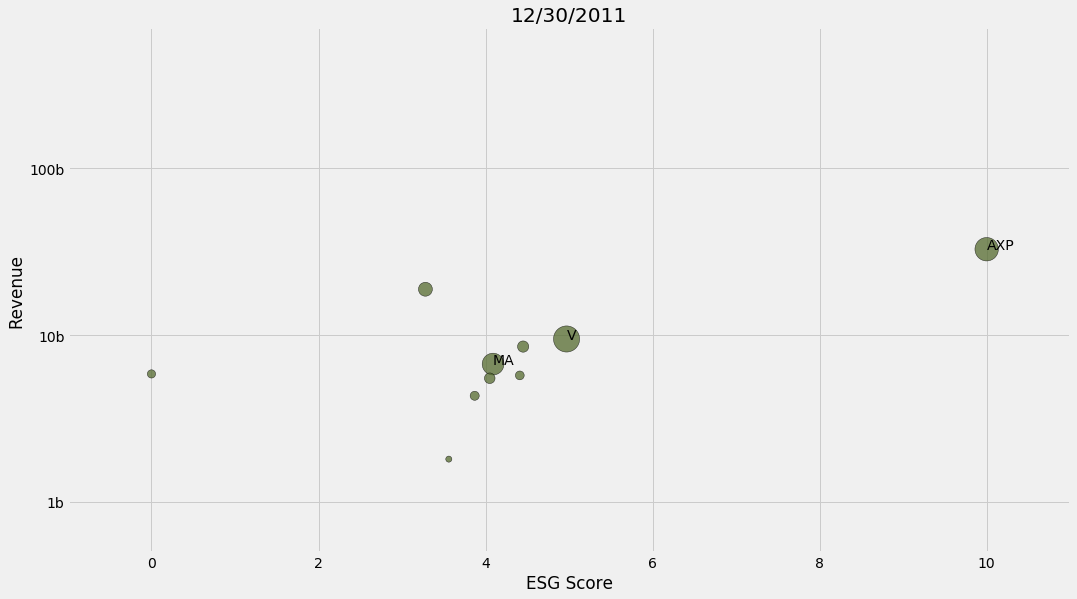

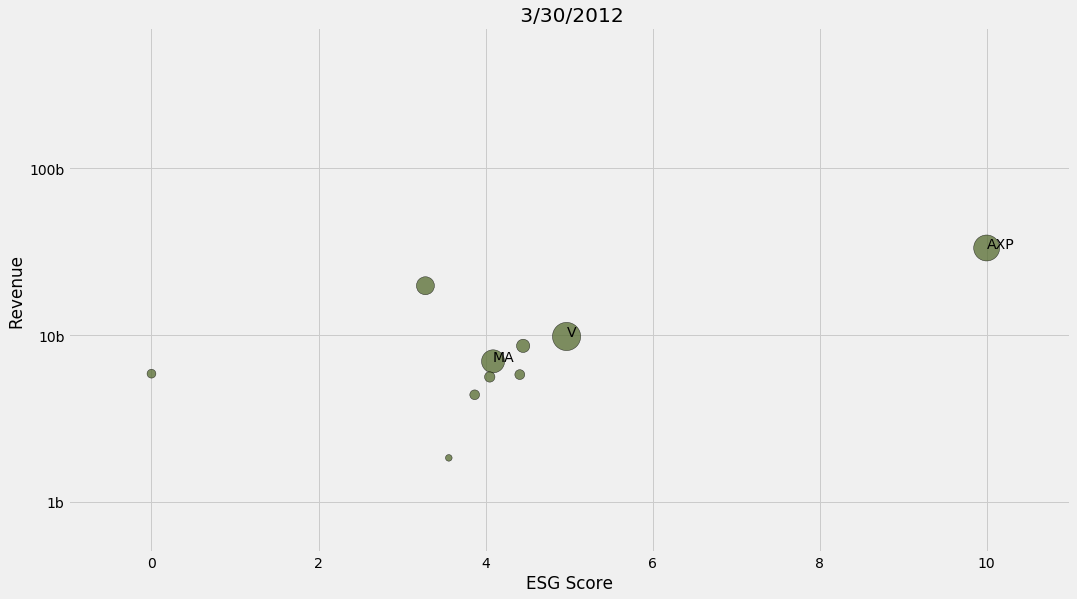

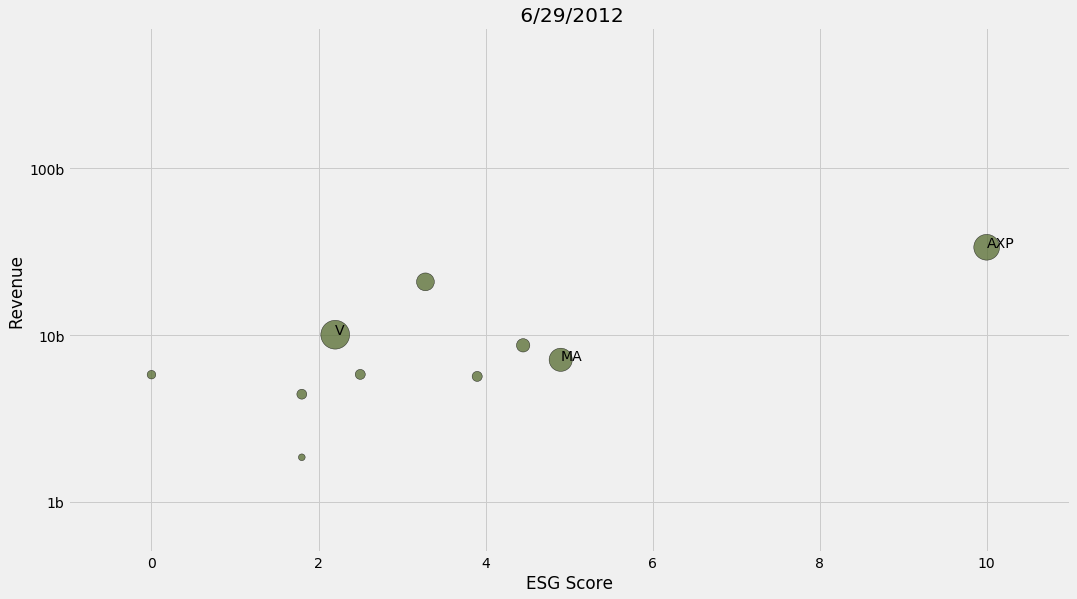

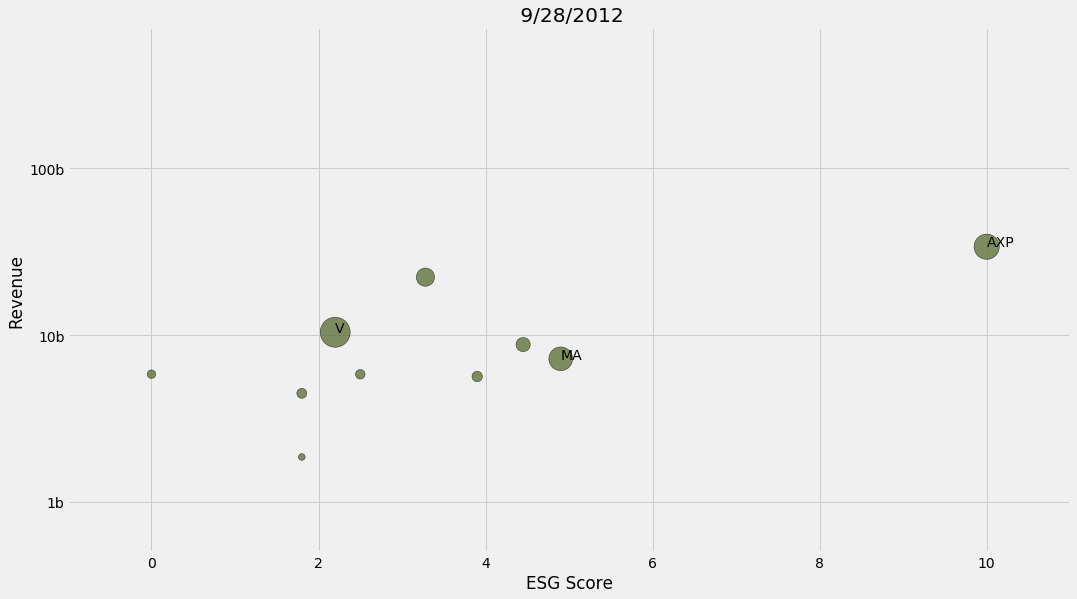

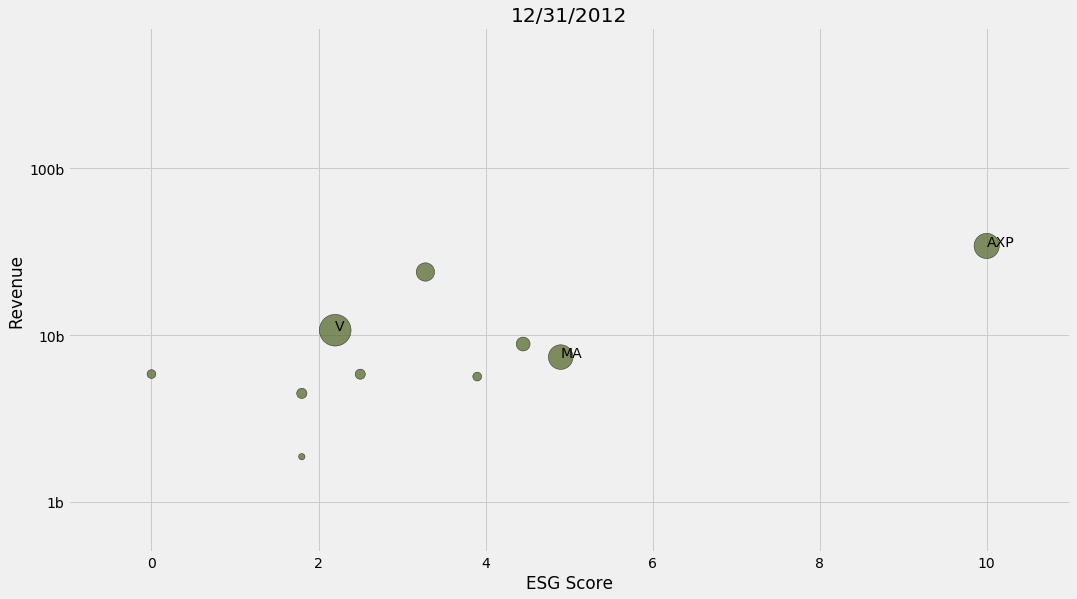

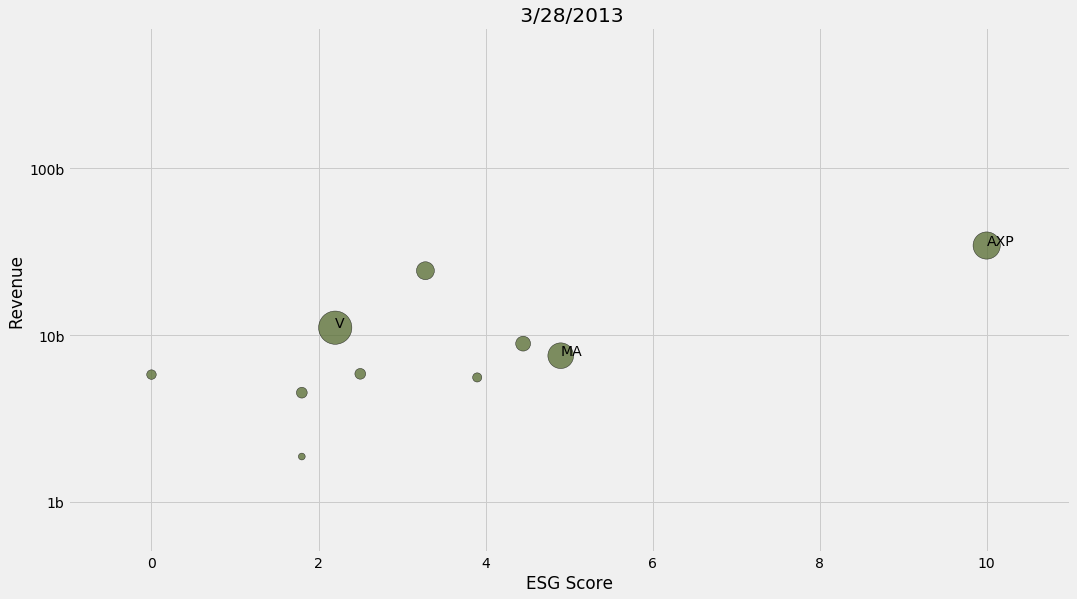

In [70]:
for date in dateA:
    hans_rosling_date_and_rbics_sect(date, 'Specialty Finance and Services')

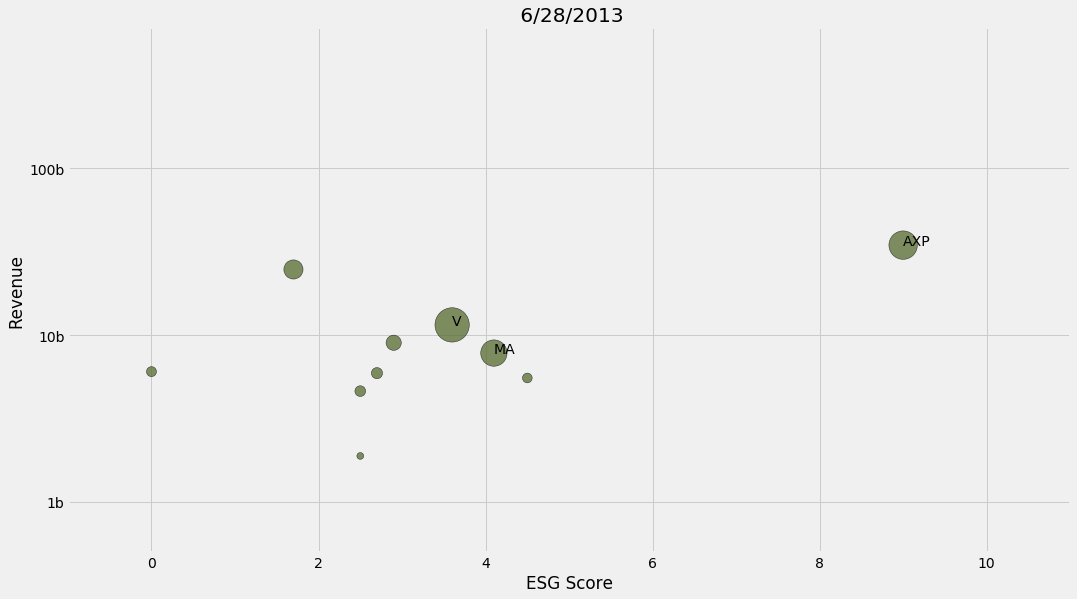

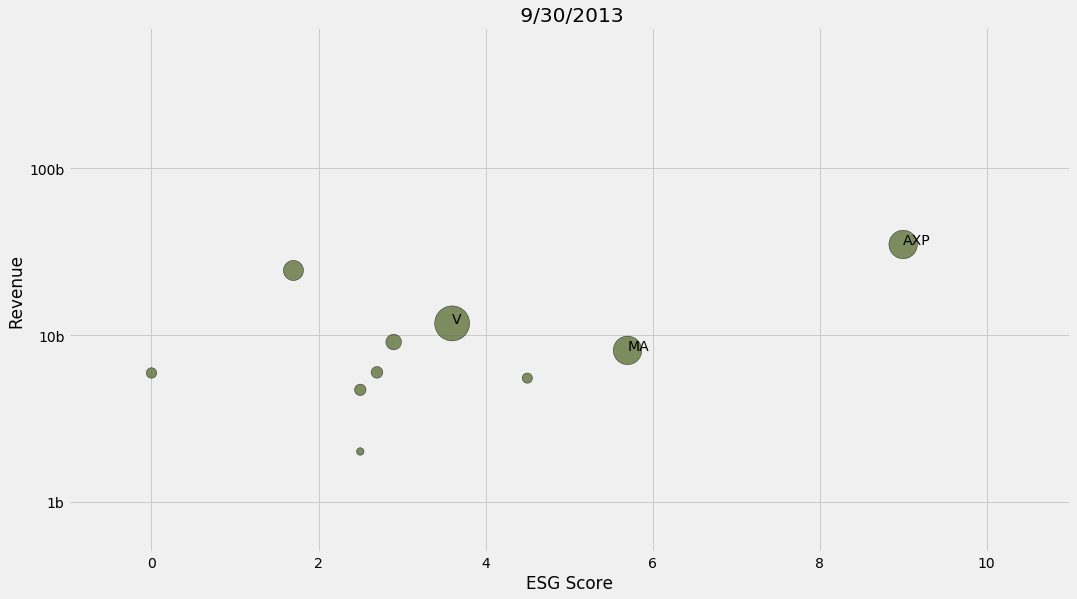

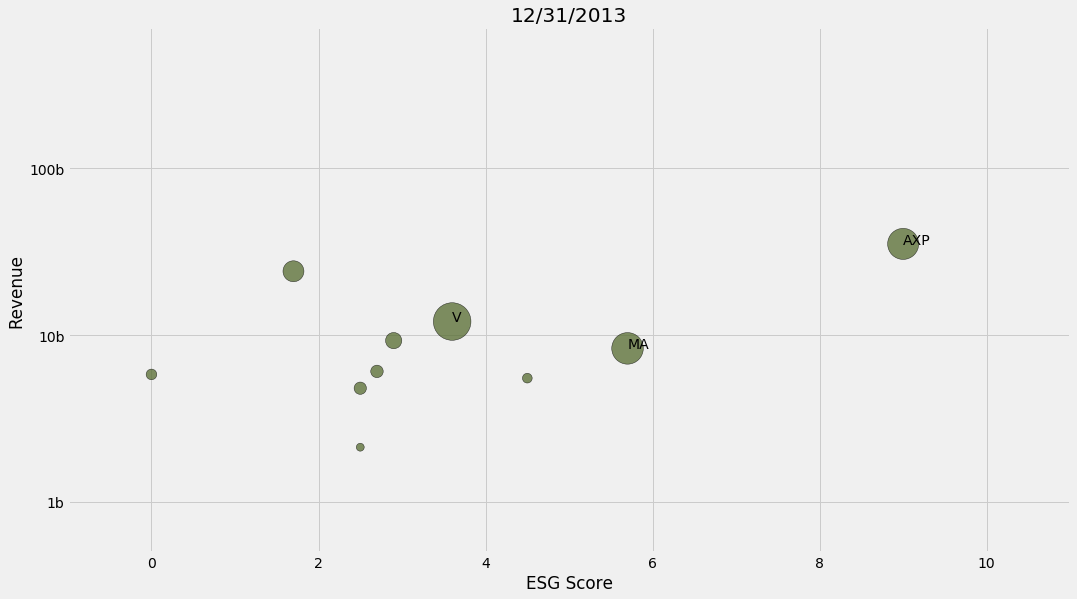

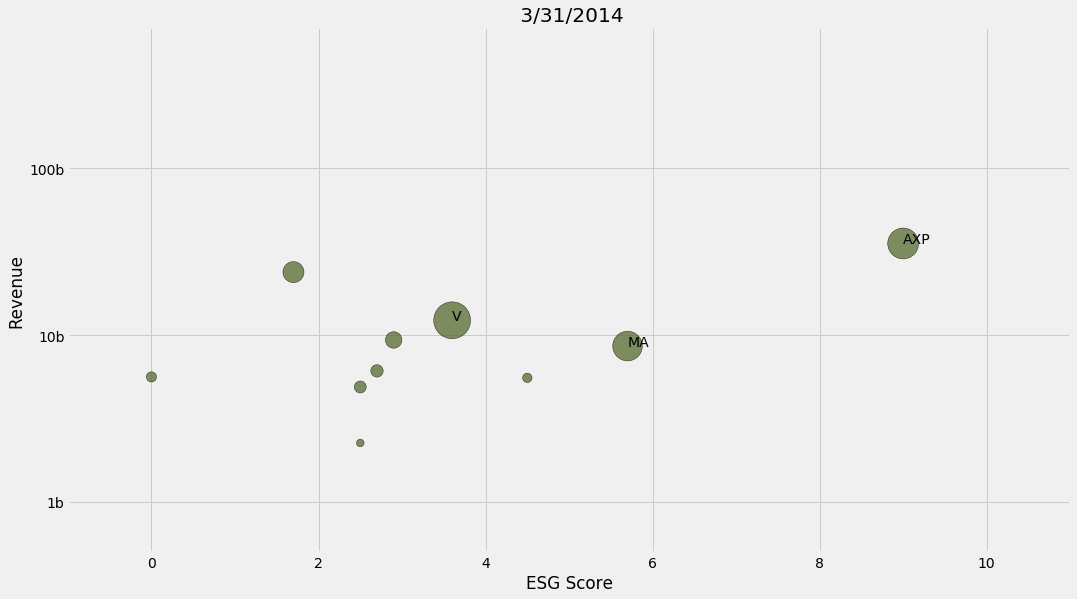

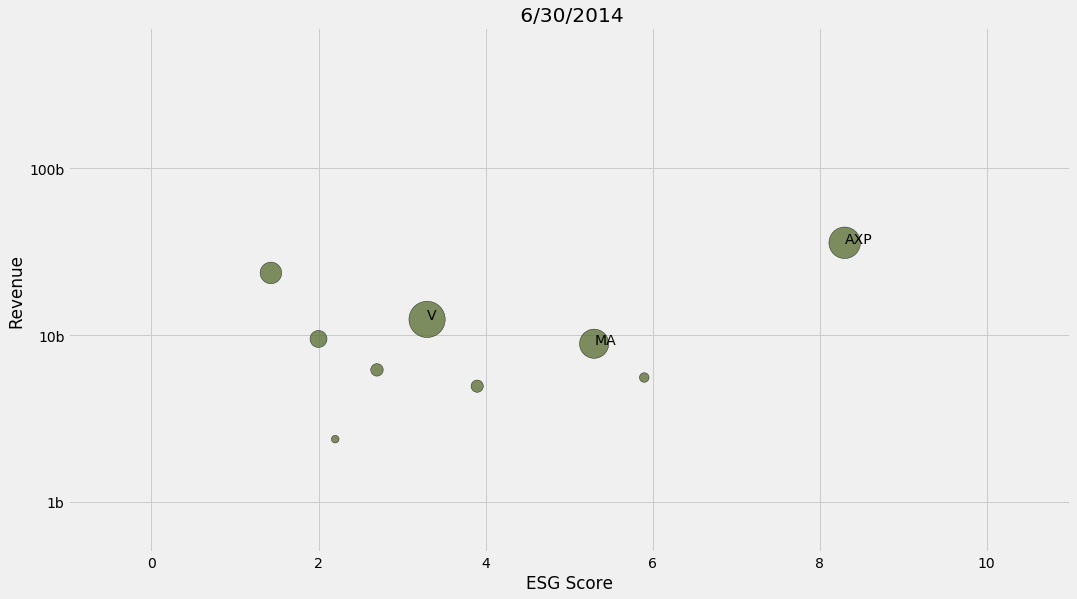

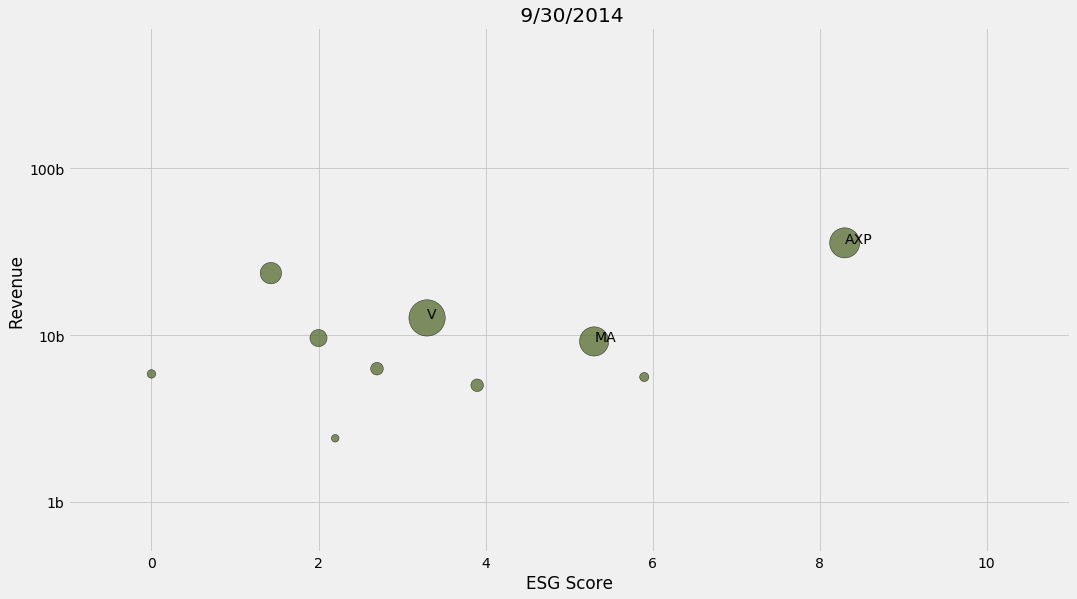

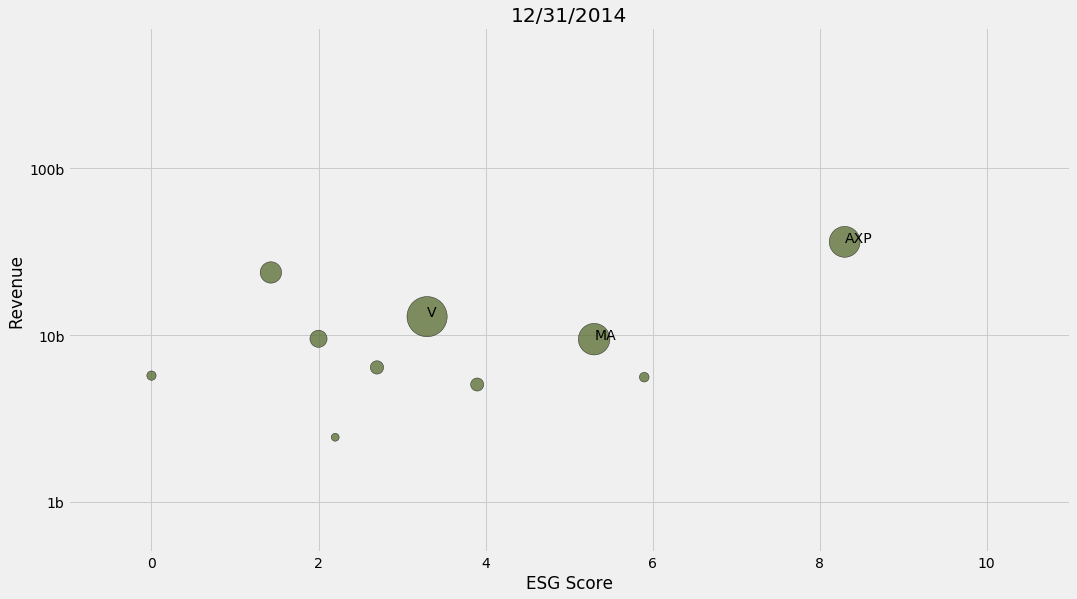

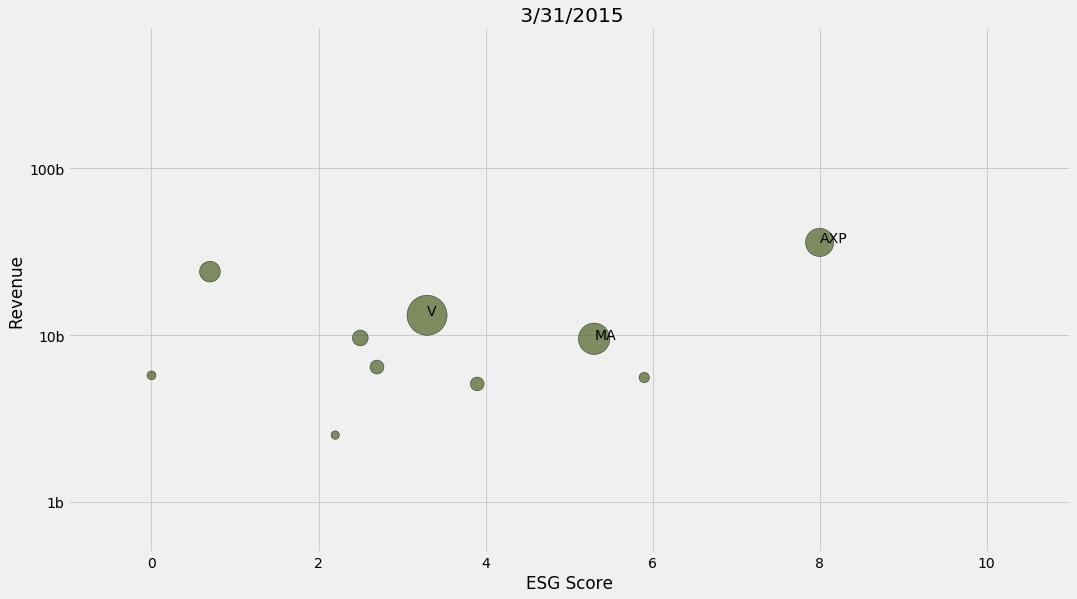

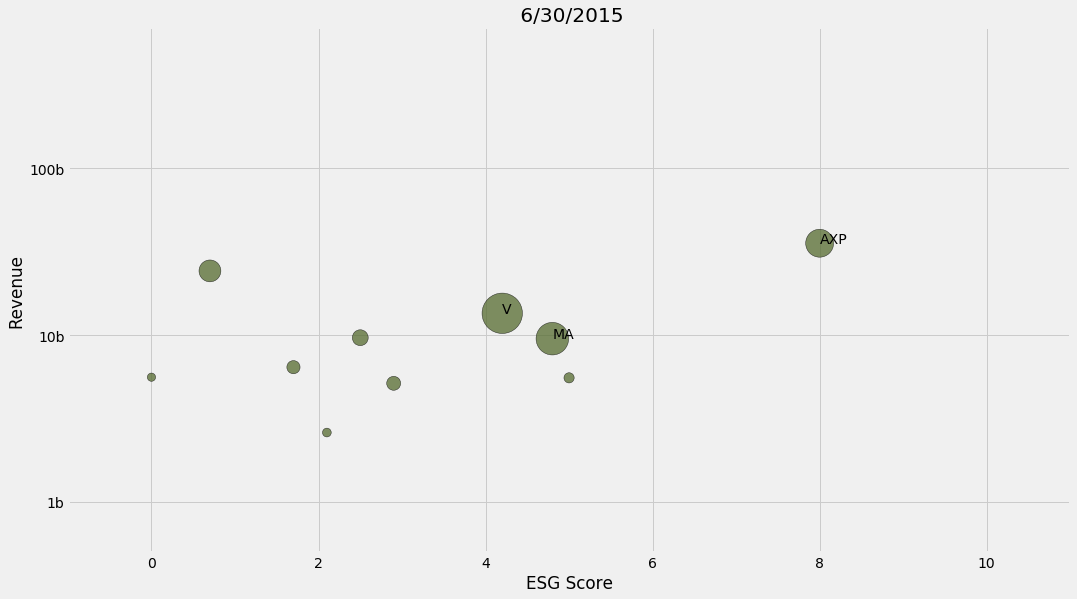

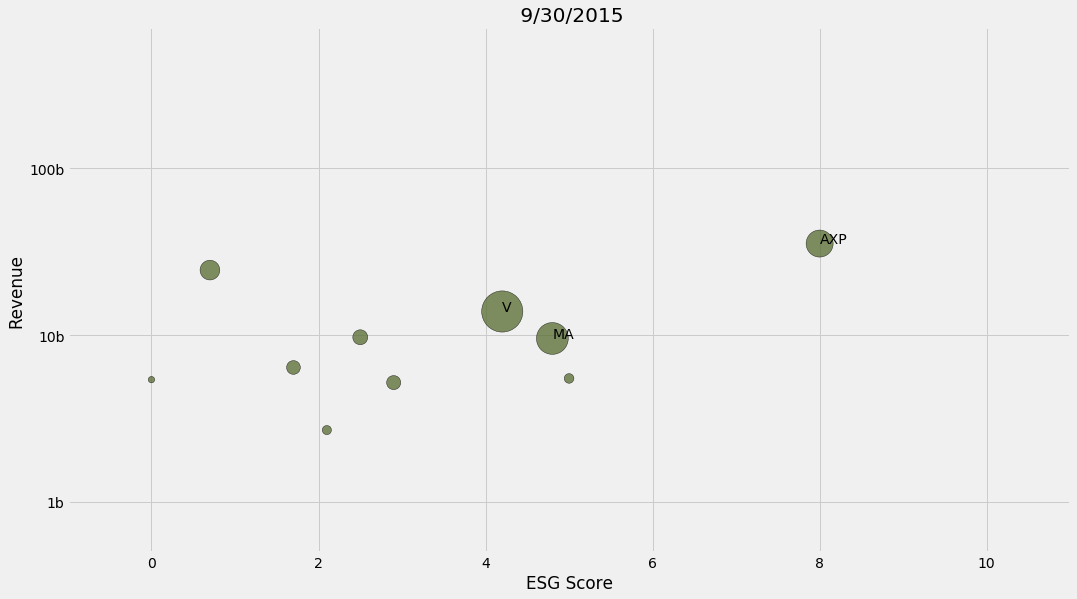

In [71]:
for date in dateB:
    hans_rosling_date_and_rbics_sect(date, 'Specialty Finance and Services')

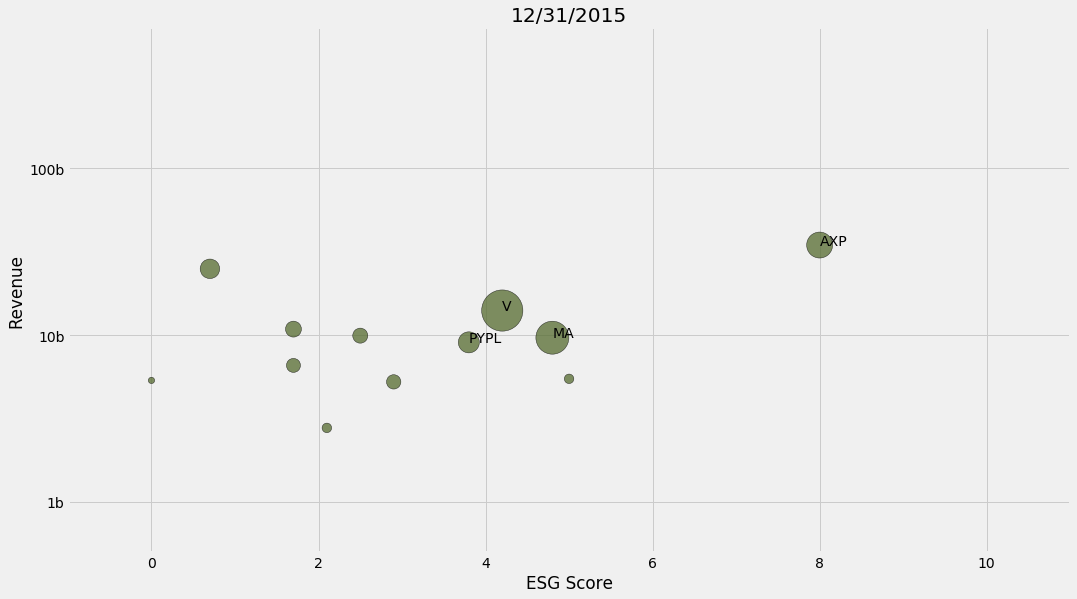

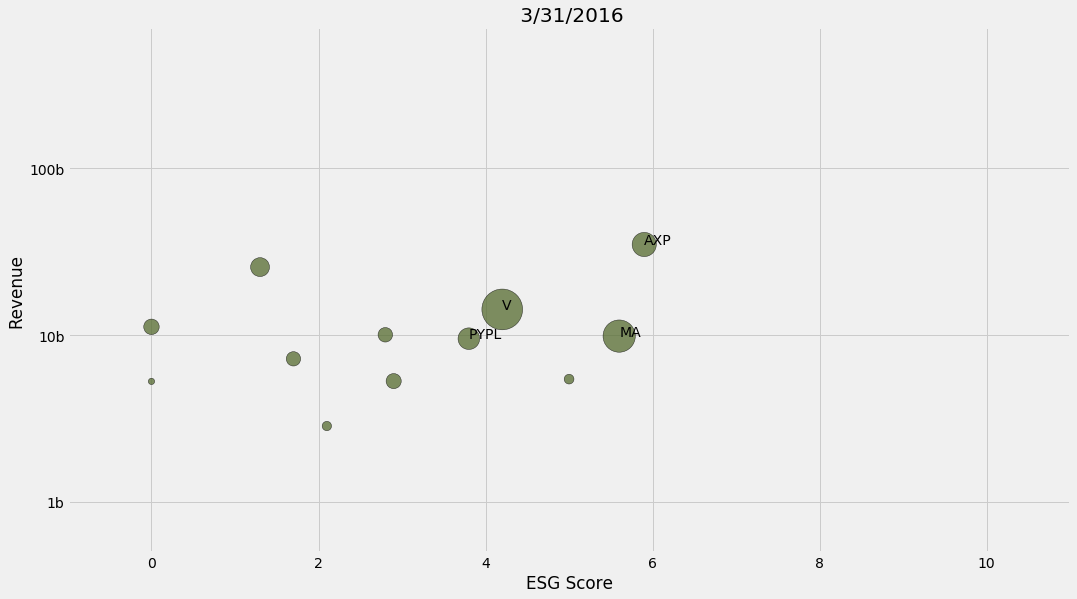

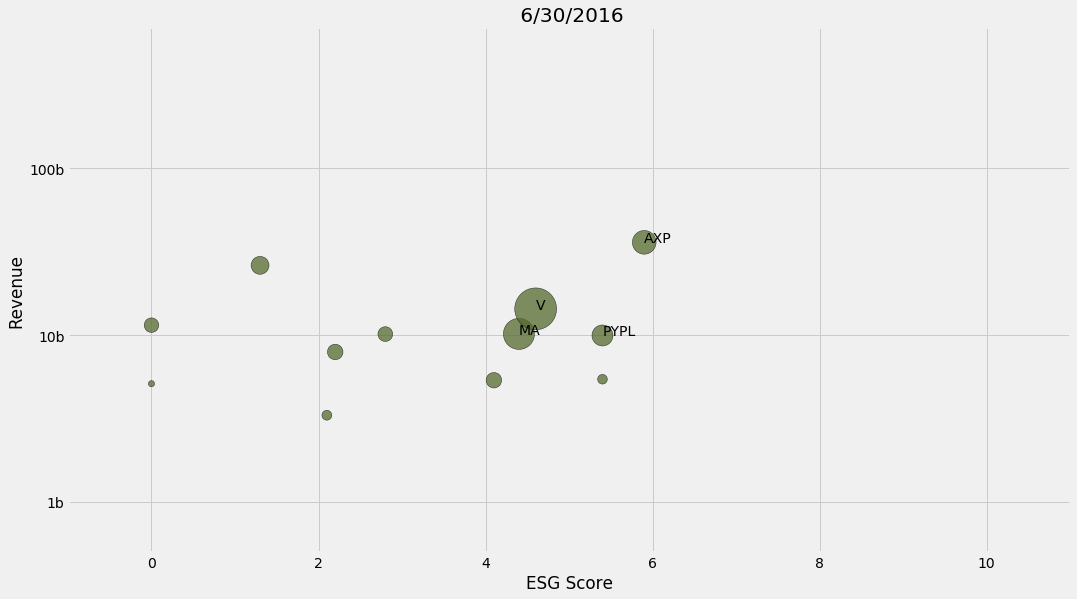

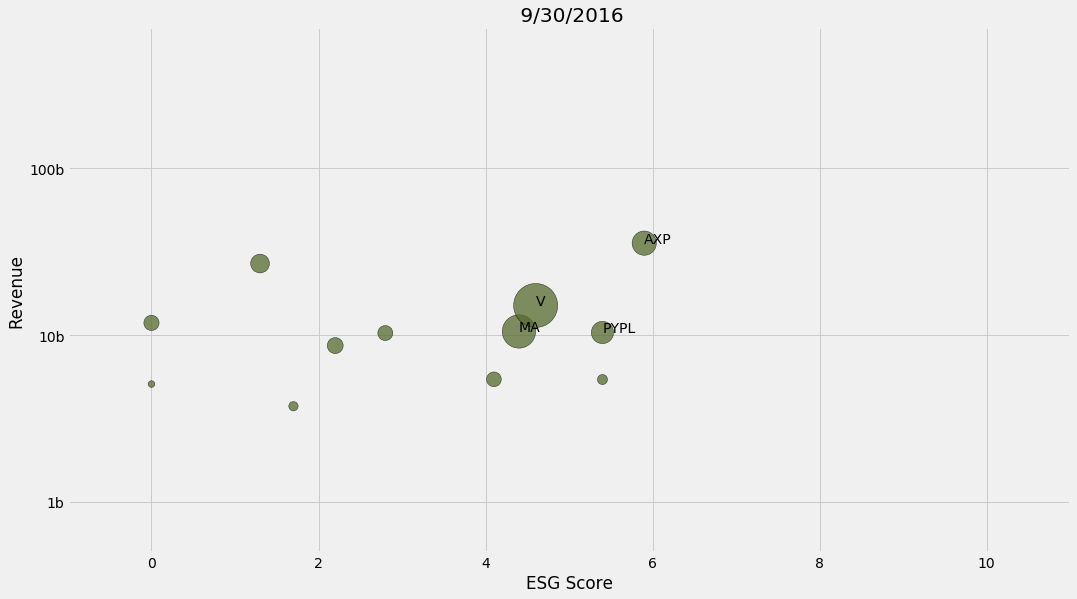

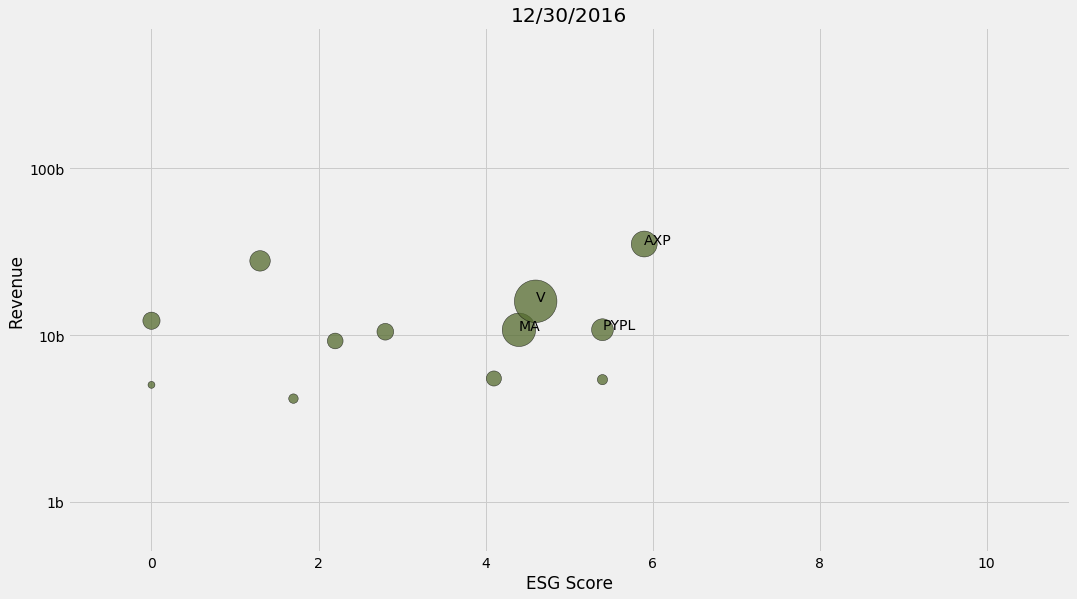

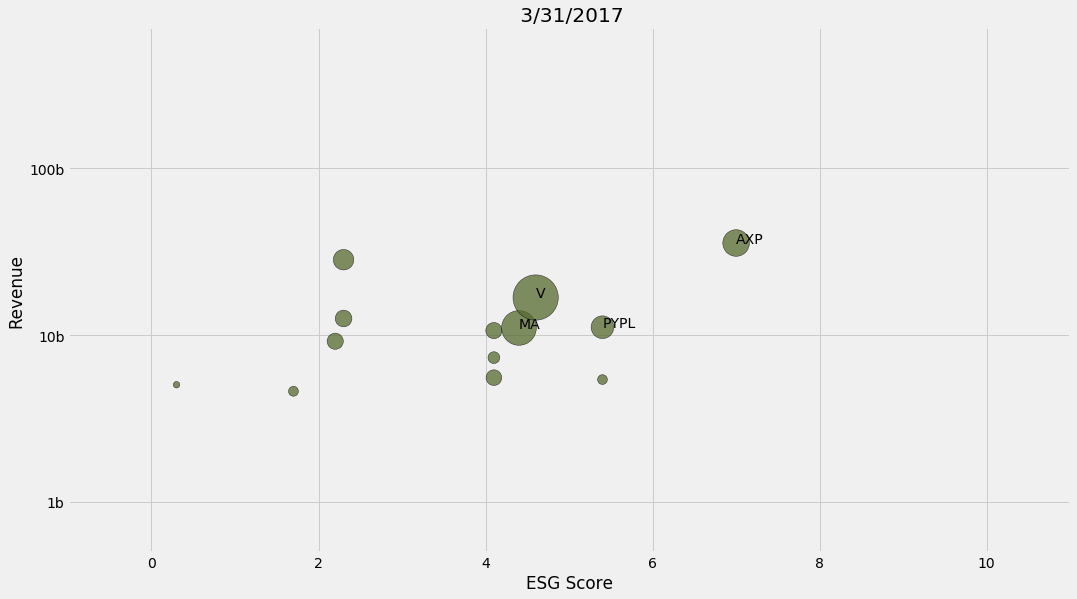

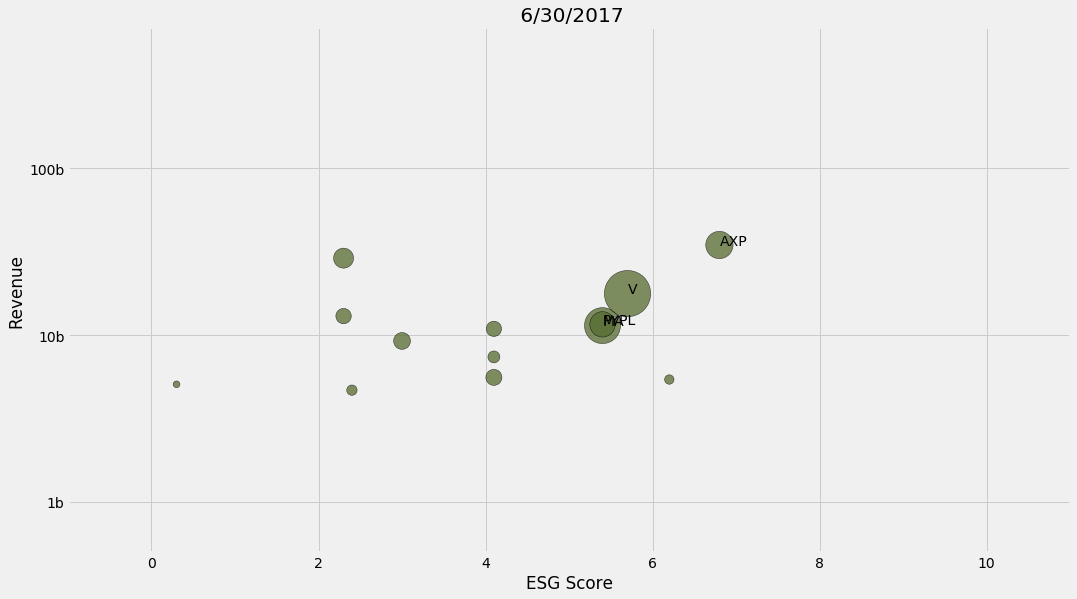

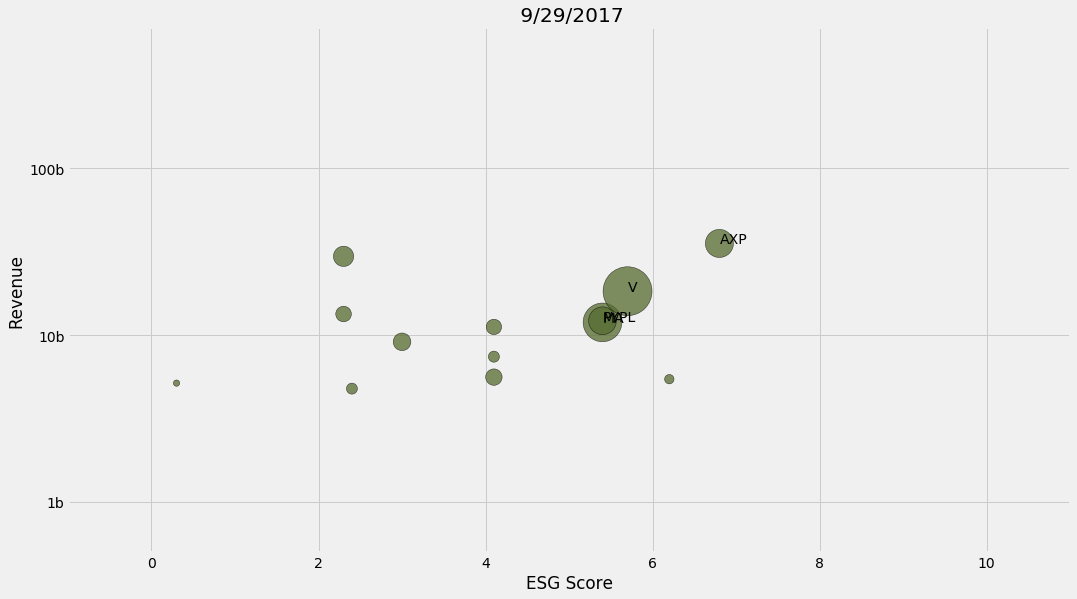

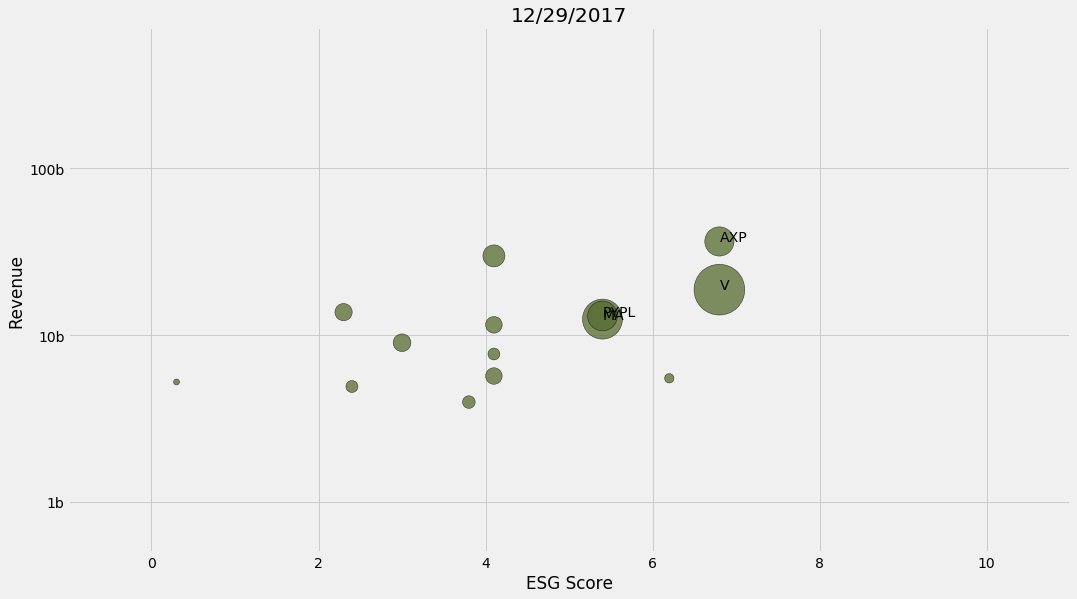

In [73]:
for date in dateC:
    hans_rosling_date_and_rbics_sect(date, 'Specialty Finance and Services')